In [1]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

from LogisticRegression import plot_classifier

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_note_interactivity = 'all'
%matplotlib inline

In [2]:
input_file = 'data_multivar.txt'
X = []
y = []

with open(input_file, 'r') as f:
    for line in f.readlines():
        data = [float(x) for x in line.split(',')]
        X.append(data[:-1])
        y.append(data[-1])

In [3]:
X = np.array(X)
y = np.array(y)

In [4]:
classifier_gaussiannb = GaussianNB()
classifier_gaussiannb.fit(X, y)
y_pred = classifier_gaussiannb.predict(X)

In [5]:
# compute accuracy of the classifier
accuracy = 100.0 * (y == y_pred).sum() / X.shape[0]    # (y == y_pred).sum()
print('Accuracy of the classifier = ', round(accuracy, 2), "%")

Accuracy of the classifier =  99.5 %


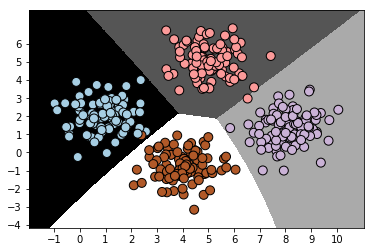

In [6]:
plot_classifier(classifier_gaussiannb, X, y)

## Splitting the dataset for training and testing 

In [7]:
from sklearn import cross_validation

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25, random_state=5)
classifier_gaussiannb_new = GaussianNB()
classifier_gaussiannb_new.fit(X_train, y_train)

/Users/linzhun/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


GaussianNB(priors=None)

In [9]:
y_test_pred = classifier_gaussiannb_new.predict(X_test)

In [10]:
accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
print("Accuracy of the classifier_gaussiannb_new = ", round(accuracy, 2), '%')

Accuracy of the classifier_gaussiannb_new =  98.0 %


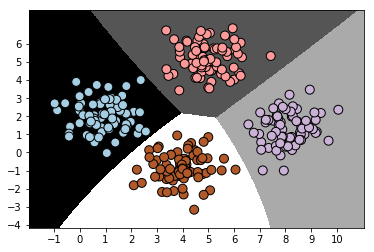

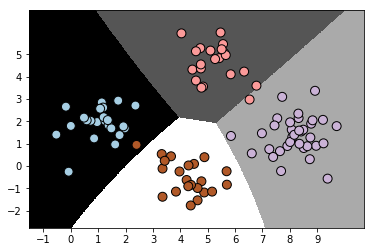

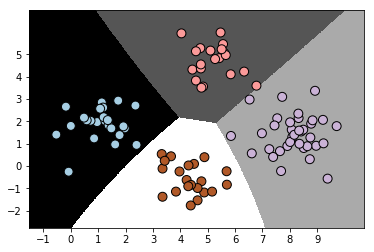

In [11]:
plot_classifier(classifier_gaussiannb_new, X_train, y_train)
plot_classifier(classifier_gaussiannb_new, X_test, y_test)
plot_classifier(classifier_gaussiannb_new, X_test, y_test_pred)

## Cross Validations

* 交叉验证对象是整个数据集X,y,自动做cv=5折验证，每次都split出test dataset并验证其评分，最后求5次分数的平均

In [9]:
num_validations = 5
accuracy = cross_validation.cross_val_score(classifier_gaussiannb_new, X, y, scoring='accuracy', cv=num_validations)
print("Accuracy: " + str(round(100*accuracy.mean(), 2)) + '%')  

Accuracy: 98.09%


## F1

In [10]:
f1 = cross_validation.cross_val_score(classifier_gaussiannb_new,X,y,scoring='f1_weighted', cv=num_validations)
f1

array([ 1.        ,  1.        ,  0.98749218,  1.        ,  0.98749218])

In [11]:
print("F1 :" + str(round(100*f1.mean(),2)) + '%')

F1 :99.5%


## Precision

In [14]:
precision = cross_validation.cross_val_score(classifier_gaussiannb_new, X, y ,scoring='precision_weighted', cv=num_validations)
precision

array([ 1.        ,  1.        ,  0.98809524,  1.        ,  0.98809524])

In [15]:
print("Precision = " + str(round(100*precision.mean(),2)) + '%')

Precision = 99.52%


## Recall

In [17]:
recall = cross_validation.cross_val_score(classifier_gaussiannb_new,X,y,scoring='recall_weighted', cv=num_validations)
print("Recall :" + str(round(100*recall.mean(),2)) + '%')

Recall :99.5%
